In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv("/content/dataset.csv")
df.drop(columns='Unnamed: 0',inplace=True)


dfYear = pd.read_csv("/content/data.csv")
dfYear = dfYear[['id','year']]
dfYear['track_id'] = dfYear['id']
dfYear.drop(columns='id',inplace=True)

#Merge 2 Dataframe
df = pd.merge(df,dfYear,on='track_id')
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9654 entries, 0 to 9653
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          9654 non-null   object 
 1   artists           9654 non-null   object 
 2   album_name        9654 non-null   object 
 3   track_name        9654 non-null   object 
 4   popularity        9654 non-null   int64  
 5   duration_ms       9654 non-null   int64  
 6   explicit          9654 non-null   bool   
 7   danceability      9654 non-null   float64
 8   energy            9654 non-null   float64
 9   key               9654 non-null   int64  
 10  loudness          9654 non-null   float64
 11  mode              9654 non-null   int64  
 12  speechiness       9654 non-null   float64
 13  acousticness      9654 non-null   float64
 14  instrumentalness  9654 non-null   float64
 15  liveness          9654 non-null   float64
 16  valence           9654 non-null   float64


None

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,year
0,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.905,0.000071,0.1320,0.1430,181.740,3,acoustic,2018
1,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.469,0.000000,0.0829,0.1670,119.949,4,acoustic,2017
2,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,...,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,acoustic,2014
3,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,...,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,piano,2014
4,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,...,1,0.0417,0.559,0.000000,0.0973,0.7120,150.960,4,acoustic,2008


In [25]:
df[df.duplicated('track_id')==True]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,year
3,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,...,1,0.0355,0.85700,0.000003,0.0913,0.0765,141.284,3,piano,2014
5,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,11,...,1,0.0417,0.55900,0.000000,0.0973,0.7120,150.960,4,rock,2008
8,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,1,...,1,0.0295,0.42600,0.004190,0.0735,0.1960,78.899,4,piano,2015
11,3ILmwMefYZoQh5Cf5jeuUQ,Motohiro Hata,Documentary,透明だった世界,61,232360,False,0.373,0.914,0,...,1,0.0565,0.07600,0.000000,0.6690,0.5600,168.210,4,j-pop,2010
12,3ILmwMefYZoQh5Cf5jeuUQ,Motohiro Hata,Documentary,透明だった世界,61,232360,False,0.373,0.914,0,...,1,0.0565,0.07600,0.000000,0.6690,0.5600,168.210,4,j-rock,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9227,1TIiWomS4i0Ikaf9EKdcLn,Tove Lo,BLUE LIPS (lady wood phase II),disco tits,64,223794,True,0.790,0.728,7,...,1,0.0612,0.02500,0.001060,0.1720,0.3330,110.059,4,synth-pop,2017
9236,6MDijuuArPJv1vbp7K1x3f,Miike Snow,iii,Genghis Khan,62,212146,False,0.688,0.847,10,...,0,0.0508,0.04000,0.000003,0.5980,0.4530,93.979,4,synth-pop,2016
9242,3VZQshi4COChhXaz7cLP02,Icona Pop;Charli XCX,I Love It (feat. Charli XCX),I Love It (feat. Charli XCX),63,155337,True,0.714,0.905,8,...,1,0.0289,0.00855,0.000025,0.1460,0.8380,125.927,4,synth-pop,2012
9420,1CgbwsrNDlFrRuk2ebQ7zr,ATB,Movin' Melodies,9Pm (Till I Come),64,193880,False,0.672,0.941,9,...,0,0.0494,0.02760,0.926000,0.1490,0.7540,130.218,4,trance,1999


In [26]:
df[df['track_id']=='6Vc5wAMmXdKIAM7WUoEb7N']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,year
2,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,...,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,acoustic,2014
3,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,...,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,piano,2014


In [27]:
# Crosstab Genre and Song

xtab_song = pd.crosstab(
    df['track_id'],
    df['track_genre']
)

xtab_song = xtab_song*2

display(xtab_song.head(),len(xtab_song))

track_genre,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,brazil,...,soul,spanish,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
track_id,,,,,,,,,,,,,,,,,,,,,
003vvx7Niy0yvhvHt4a68B,0,0,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00KfIFi2TpAaQGPbRbFbKJ,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00Y9r5SfbDdEjJhNg7laQr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00hTMcTeaaMtjBCV30yAm9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00iwQgjIgoGO94BRBDyClo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


6788

In [33]:
dfDistinct = df.drop_duplicates('track_id')
dfDistinct = dfDistinct.sort_values('track_id')
dfDistinct = dfDistinct.reset_index(drop=True)

xtab_song.reset_index(inplace=True)
data_encoded = pd.concat([dfDistinct, xtab_song], axis=1)
display(data_encoded.head(),len(data_encoded))

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,soul,spanish,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,...,0,0,0,0,0,0,0,0,0,0
1,00KfIFi2TpAaQGPbRbFbKJ,Linkin Park,LIVING THINGS,IN MY REMAINS,63,200693,False,0.553,0.907,9,...,0,0,0,0,0,0,0,0,0,0
2,00Y9r5SfbDdEjJhNg7laQr,Harold Faltermeyer;Steve Stevens,Top Gun - Motion Picture Soundtrack (Special E...,"Top Gun Anthem - From ""Top Gun"" Original Sound...",62,252200,False,0.423,0.651,0,...,0,0,0,0,0,0,0,0,0,0
3,00hTMcTeaaMtjBCV30yAm9,"Bobby Cruz;Ricardo ""Richie"" Ray",Felices Pascuas,Aguinaldo Navideño,27,253506,False,0.638,0.667,7,...,0,0,0,0,0,0,0,0,0,0
4,00iwQgjIgoGO94BRBDyClo,Kudasaibeats,Falling,The Girl I Haven't Met,56,195000,False,0.785,0.222,8,...,0,0,0,0,0,0,0,0,0,0


6788

In [29]:
numerical_features = ['explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','year']
scaler = MinMaxScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

In [30]:
# Select the relevant columns for computing item similarities
calculatied_features = numerical_features + list(xtab_song.drop(columns='track_id').columns)

cosine_sim = cosine_similarity(data_encoded[calculatied_features], data_encoded[calculatied_features])

In [34]:
def get_recommendations(title, N=5):
    indices = pd.Series(data_encoded.index, index=data_encoded['track_name']).drop_duplicates()

    try:
        idx = indices[title]
        try:
            len(idx)
            temp = 2
        except:
            temp = 1
    except KeyError:
        return "Tidak ada lagu di dataset."

    if temp == 2:
        idx = indices[title][0]
    else:
        idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:N+1]
    song_indices = [i[0] for i in sim_scores]
    recommended_songs = data_encoded[['track_name', 'artists', 'album_name']].iloc[song_indices]

    sim_scores_list = [i[1] for i in sim_scores]
    recommended_list = recommended_songs.to_dict(orient='records')
    for i, song in enumerate(recommended_list):
        song['similarity_score'] = sim_scores_list[i]

    return recommended_list

In [37]:
# Get the recommendations
recommended_songs = get_recommendations("Love", N=5)
if isinstance(recommended_songs, str):
    print(recommended_songs)
else:
    print("Recommended Songs:")
    for song in recommended_songs:
        print(f"Title: {song['track_name']}")
        print(f"Artist: {song['artists']}")
        print(f"Album: {song['album_name']}")
        print(f"Similarity Score: {song['similarity_score']:.2f}")
        print()

Recommended Songs:
Title: No One
Artist: Alicia Keys
Album: As I Am (Expanded Edition)
Similarity Score: 1.00

Title: Wild (feat. Gary Clark Jr.)
Artist: John Legend;Gary Clark Jr.
Album: Bigger Love
Similarity Score: 1.00

Title: You & I (Nobody in the World)
Artist: John Legend
Album: Love In The Future (Expanded Edition)
Similarity Score: 0.99

Title: Forrest Gump
Artist: Frank Ocean
Album: channel ORANGE
Similarity Score: 0.99

Title: Girl on Fire
Artist: Alicia Keys
Album: Girl on Fire (Remixes) - EP
Similarity Score: 0.99



In [ ]:
dfP= pd.read_csv("/content/data.csv", sep=",")

In [ ]:
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
dfP.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
dfP['decade'] = dfP['year'].apply(lambda year : f'{(year//10)*10}s' )

Text(0.5, 1.0, 'Distribution of Music')

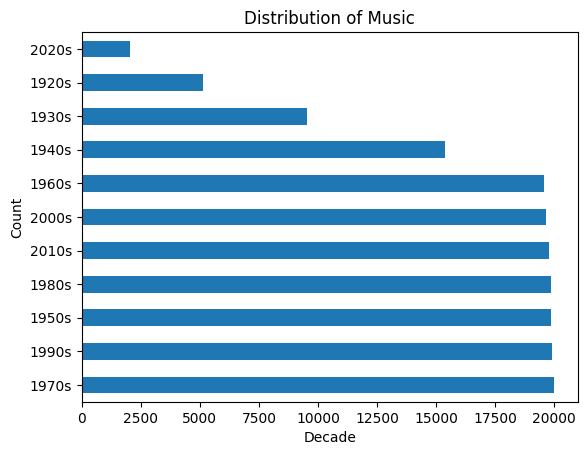

In [ ]:
decades = dfP.decade.value_counts()
decades.plot(kind='barh')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Distribution of Music')

In [ ]:
song_popularity = dfP[['name', 'popularity']].set_index('name').to_dict()['popularity']
song_popularity = sorted(song_popularity.items(), key=lambda x: x[1], reverse=True)

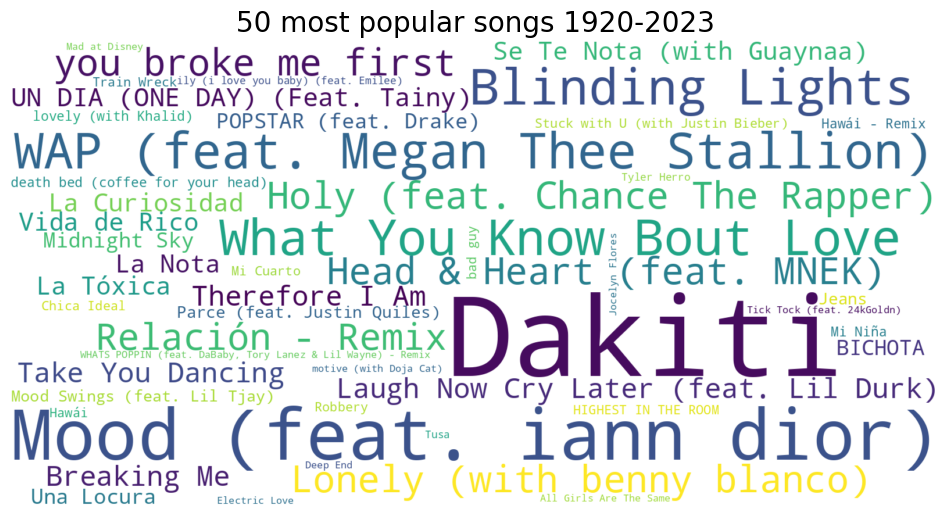

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white').generate_from_frequencies(dict(song_popularity))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('50 most popular songs 1920-2023', fontsize=20)
plt.show()

In [ ]:
data = pd.read_csv('dataset.csv')

In [ ]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
data['popularity_flag'] = 0
data.loc[data['popularity'] > 50, 'popularity_flag'] = 1

In [ ]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_flag
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


In [ ]:
data2 = data.drop(['Unnamed: 0', 'track_id','artists','album_name','track_name','popularity'], axis=1)

In [ ]:
pop_corr = data2[data2.columns[1:]].corr()['popularity_flag'][:-1]

In [ ]:
ts_list = pop_corr.values.tolist()

In [ ]:
ts_list_abs =  [abs(ele) for ele in ts_list]

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

average = Average(ts_list_abs)
average

0.04045931059253117

In [ ]:
pop_corr_df = pop_corr.to_frame()
pop_corr_df

,popularity_flag
explicit,0.057929
danceability,0.052042
energy,-0.022272
key,-0.001434
loudness,0.034287
mode,-0.026222
speechiness,-0.049382
acousticness,-0.035406
instrumentalness,-0.081798
liveness,-0.086904


In [ ]:
pop_corr_df['pop_flag_abs'] = abs(pop_corr_df['popularity_flag'])

In [ ]:
pop_corr_abv = pop_corr_df[(pop_corr_df['pop_flag_abs']>average)]
pop_corr_abv = pop_corr_abv.sort_values(by=['pop_flag_abs'], ascending=False)
pop_corr_abv

,popularity_flag,pop_flag_abs
liveness,-0.086904,0.086904
instrumentalness,-0.081798,0.081798
explicit,0.057929,0.057929
danceability,0.052042,0.052042
speechiness,-0.049382,0.049382


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       114000 non-null  int64  
 1   explicit          114000 non-null  bool   
 2   danceability      114000 non-null  float64
 3   energy            114000 non-null  float64
 4   key               114000 non-null  int64  
 5   loudness          114000 non-null  float64
 6   mode              114000 non-null  int64  
 7   speechiness       114000 non-null  float64
 8   acousticness      114000 non-null  float64
 9   instrumentalness  114000 non-null  float64
 10  liveness          114000 non-null  float64
 11  valence           114000 non-null  float64
 12  tempo             114000 non-null  float64
 13  time_signature    114000 non-null  int64  
 14  track_genre       114000 non-null  object 
 15  popularity_flag   114000 non-null  int64  
dtypes: bool(1), float64(

In [ ]:
dummies_var = ["explicit","track_genre"]
data3 = pd.get_dummies(data2 , prefix=dummies_var, columns=dummies_var, drop_first=True )
data3.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,...,0,0,0,0,0,0,0,0,0,0
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,...,0,0,0,0,0,0,0,0,0,0
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,...,0,0,0,0,0,0,0,0,0,0
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,...,0,0,0,0,0,0,0,0,0,0
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Putting feature variable to X
X = data3.drop(['popularity_flag'],axis=1)

# Putting response variable to y
y = data3['popularity_flag']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=12345)
X_train.shape, X_test.shape

((96900, 127), (17100, 127))

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

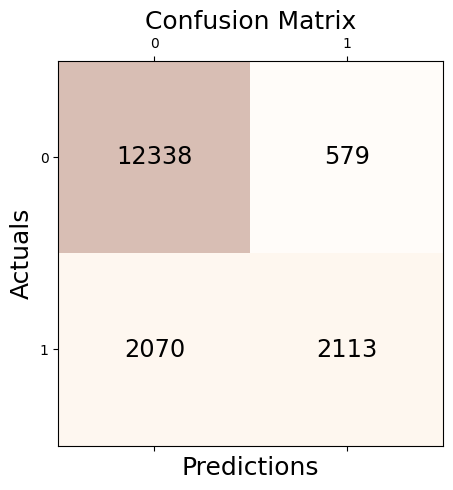

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_train_predrf = rf.predict(X_train)
y_test_predrf = rf.predict(X_test)

conf_matrix_rf = confusion_matrix(y_true=y_test, y_pred=y_test_predrf)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_rf, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_rf[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print("Accuracy: ", (conf_matrix_rf[0,0]+conf_matrix_rf[1,1])/(conf_matrix_rf[0,0]+conf_matrix_rf[1,1]+conf_matrix_rf[0,1]+conf_matrix_rf[1,0]) )
print("Precision: ", (conf_matrix_rf[0,0])/(conf_matrix_rf[0,0]+conf_matrix_rf[0,1]) )
print("Recall: ", (conf_matrix_rf[0,0])/(conf_matrix_rf[0,0]+conf_matrix_rf[1,0]) )

Accuracy:  0.8450877192982457
Precision:  0.9551753503135403
Recall:  0.856329816768462
